<a href="https://colab.research.google.com/github/jiw0n-lee/ESAA/blob/main/YB_week5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류**

## **01 분류의 개요**

지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

**지도학습의 대표적인 유형인 분류** : 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

**-> 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별**

**앙상블**은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, **일반적으로는 배깅과 부스팅 방식**으로 나뉨

**배깅 방식의 대표인 랜덤 포레스트**는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간 등으로 많은 분석가가 애용하는 알고리즘임

근래의 앙상블 방법은 **부스팅 방식**으로 지속해서 발전하고 있음

* 그래디언트 부스팅의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠음

* 하지만 XgBoost와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡음

앙상블은 서로 다른/또는 같은 알고리즘을 결합하는데, 대부분은 동일한 알고리즘을 결합한다.

**앙상블의 기본 알고리즘**으로 일반적으로 사용하는 것이 **결정 트리**임.



## **02 결정 트리**

* 데이터에 있는 규칙을 **학습을 통해 자동으로 찾아내** **트리 기반의 분류 규칙을 만드는 것**


일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타나는 것임
-> 따라서 "데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가" 가 알고리즘의 성능을 크게 좌우함

In [ ]:
import seaborn as sns
import numpy as np

### **결정 트리 모델의 특징**

* **결정트리의 가장 큰 장점** : **정보의 '균일도'라는 룰을 기반**으로 하고 있어서 알고리즘이 쉽고 직관적임

* 또한 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음

* 결정트리 모델의 가장 큰 단점 : 과적합으로 정확도가 떨어진다


### **결정 트리 파라미터**

### **결정 트리 모델의 시각화**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names= iris_data.feature_names, impurity=True, filled=True)

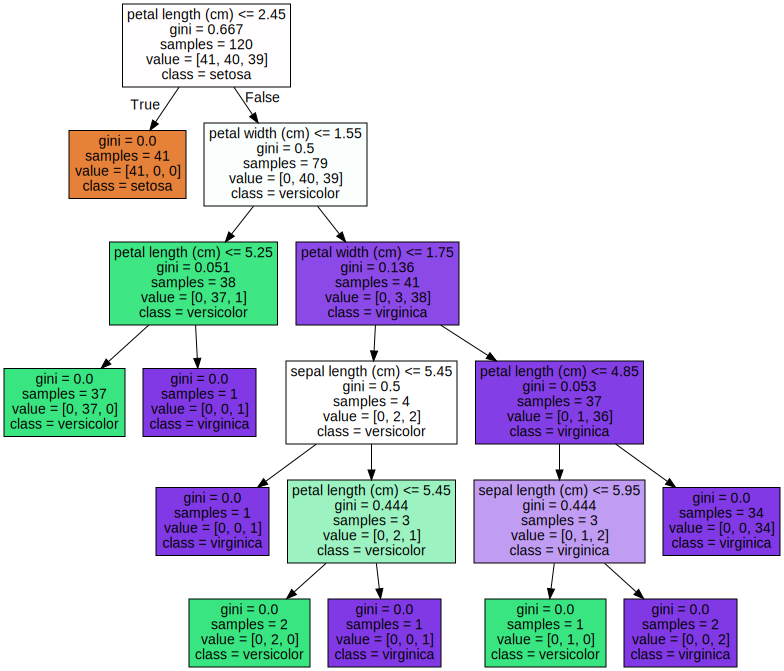

In [ ]:
import graphviz
# 위에서 생성된 tree.plot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

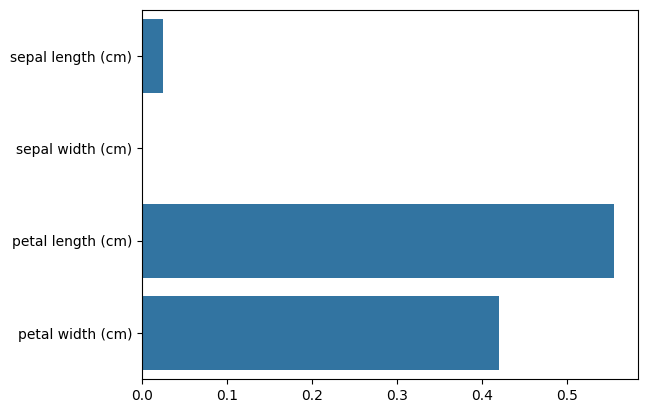

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매칭
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### **결정 트리 과적합**

사이킷런의 make_classification() 함수를 통해 분류를 위한 테스트용 데이터를 쉽게 만들 수 있다.



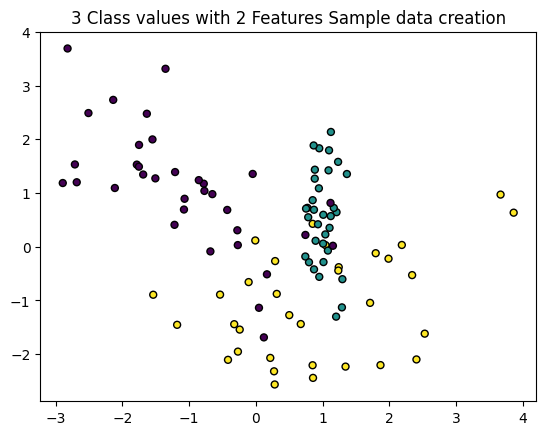

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피러로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker="o", c=y_labels, s=25, edgecolor='k')